In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
diabetes_012_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_012_health_indicators_BRFSS2015.csv'
diabetes_binary_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_binary_health_indicators_BRFSS2015.csv'
diabetes_binary_5050split_health_indicators_BRFSS2015 = 'https://raw.githubusercontent.com/Panta-Rhei-LZ/DS-9000-Project-Data/refs/heads/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

# Load the CSV file
diabetes_012_health_indicators_BRFSS2015 = pd.read_csv(diabetes_012_health_indicators_BRFSS2015)
diabetes_binary_health_indicators_BRFSS2015 = pd.read_csv(diabetes_binary_health_indicators_BRFSS2015)
diabetes_binary_5050split_health_indicators_BRFSS2015 = pd.read_csv(diabetes_binary_5050split_health_indicators_BRFSS2015)

In [31]:
df = diabetes_binary_5050split_health_indicators_BRFSS2015
# df = diabetes_binary_health_indicators_BRFSS2015
df = df.sample(len(df))

X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
34949              0.0     0.0       1.0        1.0  25.0     0.0     0.0   
64377              1.0     1.0       1.0        1.0  33.0     1.0     0.0   
41601              1.0     1.0       1.0        1.0  30.0     0.0     0.0   
62955              1.0     0.0       1.0        1.0  32.0     0.0     0.0   
31345              0.0     1.0       1.0        1.0  27.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
34949                   0.0           1.0     1.0      1.0                0.0   
64377                   1.0           0.0     0.0      0.0                0.0   
41601                   0.0           1.0     1.0      1.0                0.0   
62955                   0.0           1.0     0.0      1.0                0.0   
31345                   0.0           0.0     0.0      0.0                0.0   

       AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
34949            1.0          0.0      1.0       0.0       0.0       0.0  0.0   
64377            1.0          1.0      5.0       5.0      30.0       0.0  1.0   
41601            1.0          1.0      1.0       0.0       0.0       0.0  0.0   
62955            1.0          0.0      2.0       0.0       0.0       0.0  1.0   
31345            0.0          0.0      2.0       0.0       0.0       0.0  0.0   

        Age  Education  Income  
34949   3.0        5.0     8.0  
64377  12.0        4.0     2.0  
41601   9.0        5.0     3.0  
62955   7.0        6.0     8.0  
31345   7.0        4.0     3.0

## Interactions

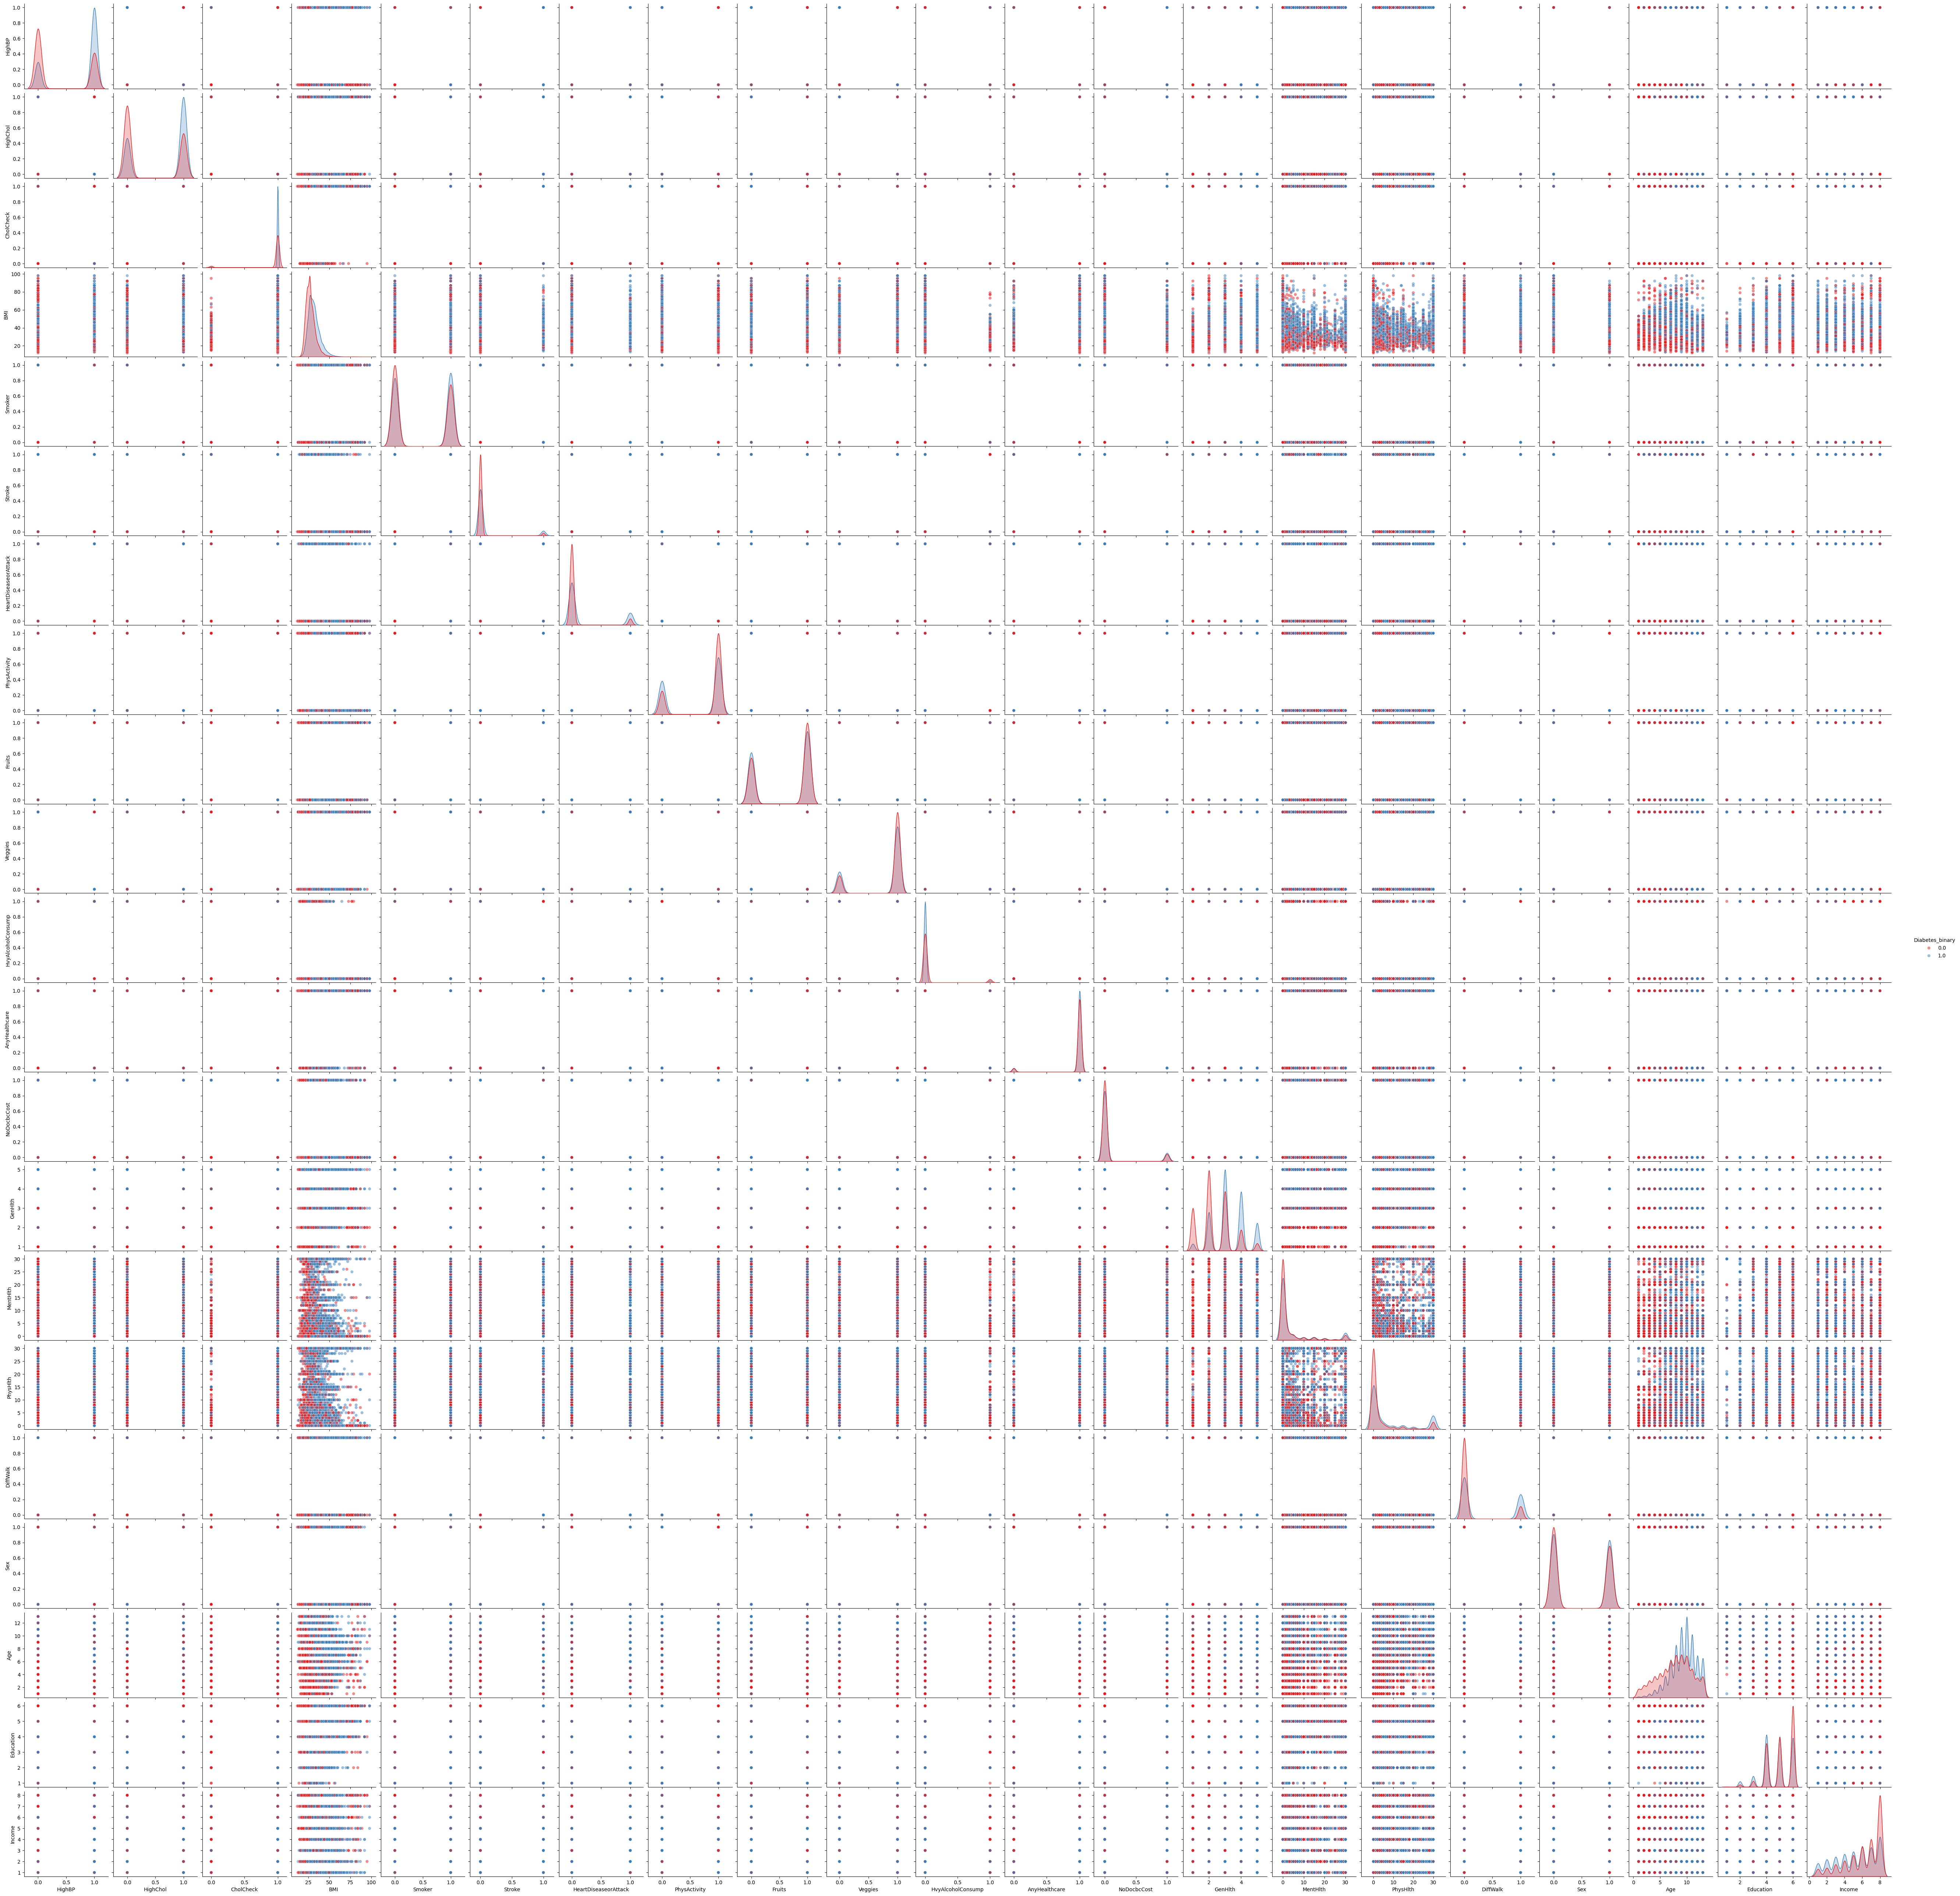

In [37]:
# Create a pairplot to visualize the interactions between features
sns.pairplot(df, hue='Diabetes_binary', palette="Set1", plot_kws={'alpha': 0.5})
plt.show()

<Figure size 2000x2000 with 0 Axes>

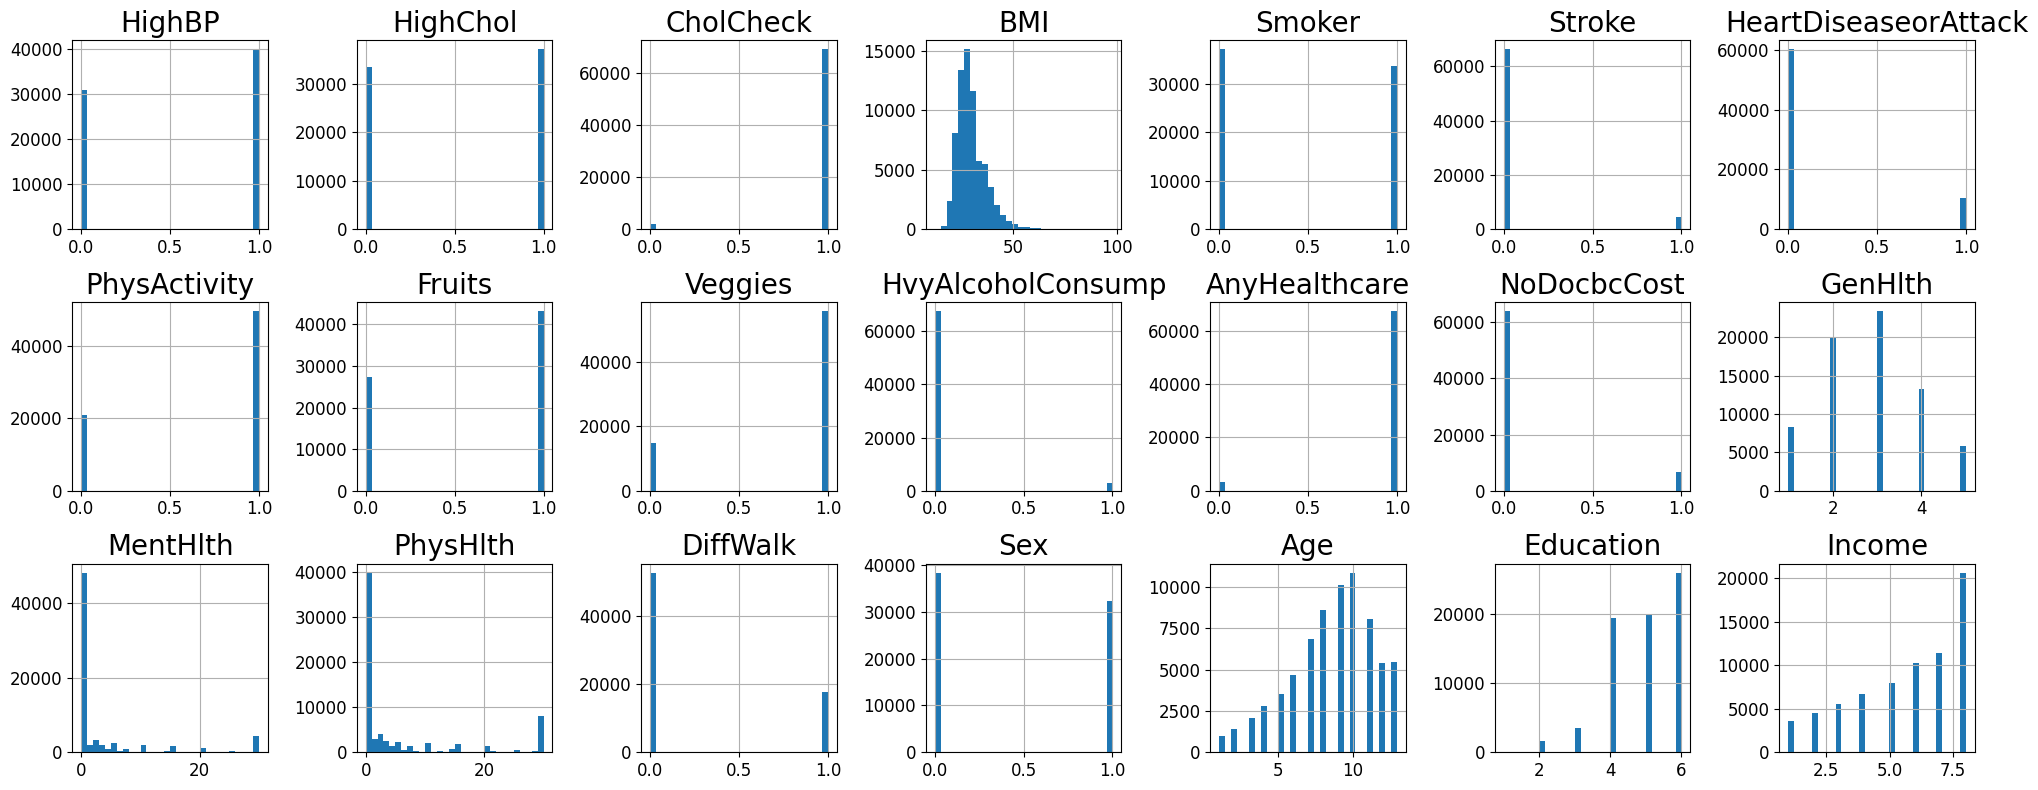

In [39]:
# Assuming X is a DataFrame
plt.figure(figsize=(20, 20))  # Adjust the figure size appropriately
ax = X.hist(bins=30, figsize=(20, 8), layout=(3, 7))  # Create histograms for all columns in the DataFrame

# Iterate through each subplot to adjust font sizes
for row in ax:
    for subplot in row:
        subplot.set_title(subplot.get_title(), fontsize=20)  # Adjust title font size
        subplot.set_xlabel(subplot.get_xlabel(), fontsize=15)  # Adjust x-axis label font size
        subplot.set_ylabel(subplot.get_ylabel(), fontsize=15)  # Adjust y-axis label font size
        subplot.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick label font size

plt.tight_layout()
plt.show()

### Age vs Diabetes

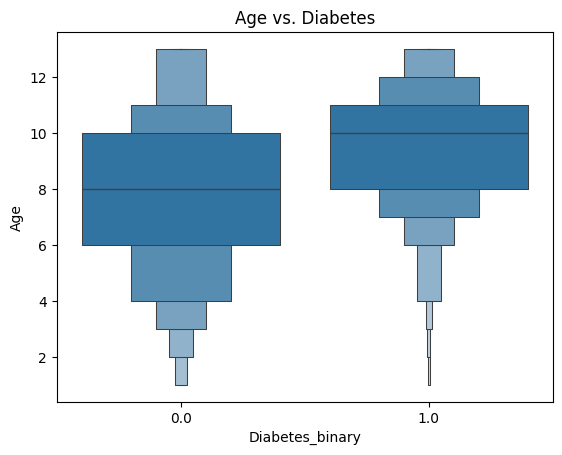

In [5]:
import seaborn as sns
age_diabetes = sns.boxenplot(x='Diabetes_binary', y='Age', data=df)
plt.title("Age vs. Diabetes")
plt.show()

### BMI vs. Diabetes

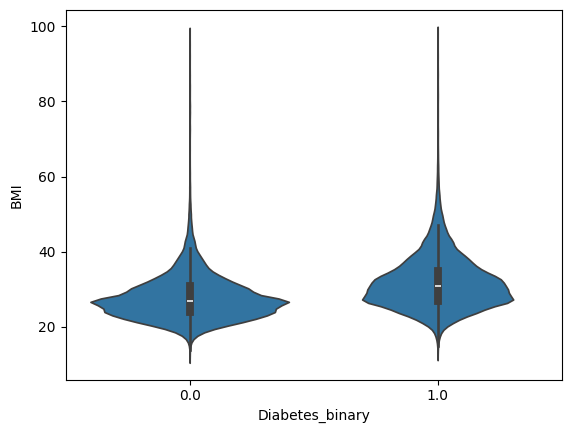

In [6]:
bmi_diabetes = sns.violinplot(x='Diabetes_binary', y='BMI', data=df)

plt.show()

### Smoker vs Diabetes

In [7]:
pd.crosstab(df['Diabetes_binary'], df['Smoker'])

Smoker             0.0    1.0
Diabetes_binary              
0.0              20065  15281
1.0              17029  18317

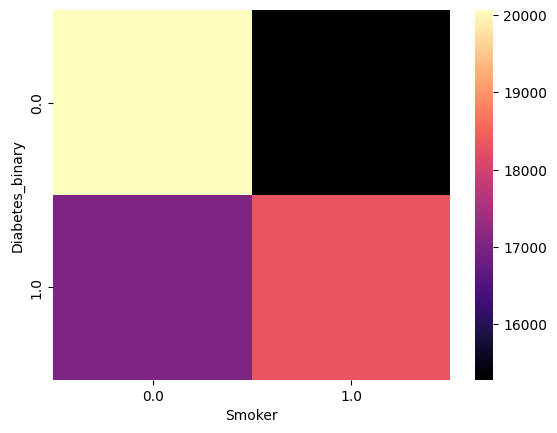

In [8]:
smoker_diabetes = sns.heatmap(pd.crosstab(df['Diabetes_binary'], df['Smoker']), cmap='magma')
plt.show()

### Sex vs. Diabetes

In [9]:
pd.crosstab(df['Diabetes_binary'], df['Sex'])

Sex                0.0    1.0
Diabetes_binary              
0.0              19975  15371
1.0              18411  16935

### HighBP vs Diabetes

In [10]:
pd.crosstab(df['Diabetes_binary'], df['HighBP'])

HighBP             0.0    1.0
Diabetes_binary              
0.0              22118  13228
1.0               8742  26604

### Mental Health vs Diabetes

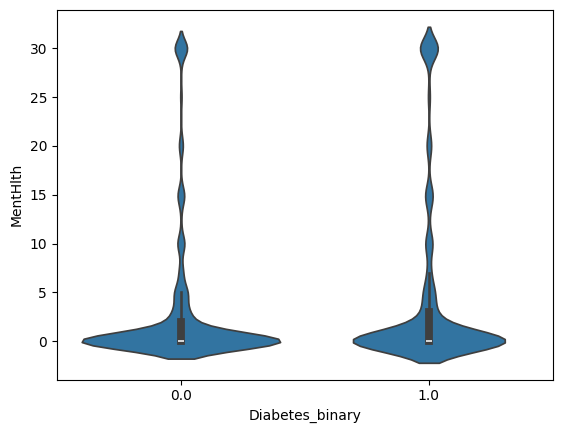

In [11]:
mentalhealth_diabetes = sns.violinplot(x='Diabetes_binary', y='MentHlth', data=df)


### Physical health

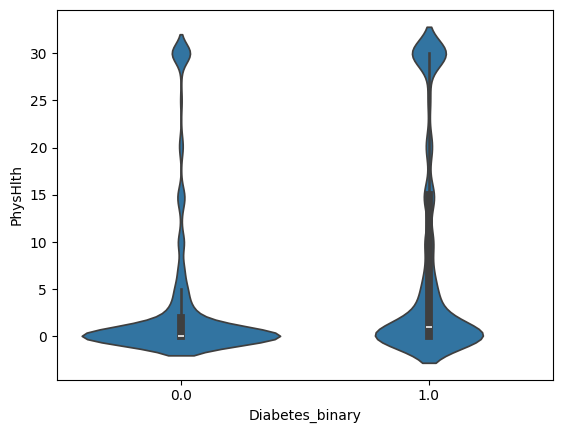

In [12]:
physical_diabetes = sns.violinplot(x='Diabetes_binary', y='PhysHlth', data=df)

### Income vs Diabetes

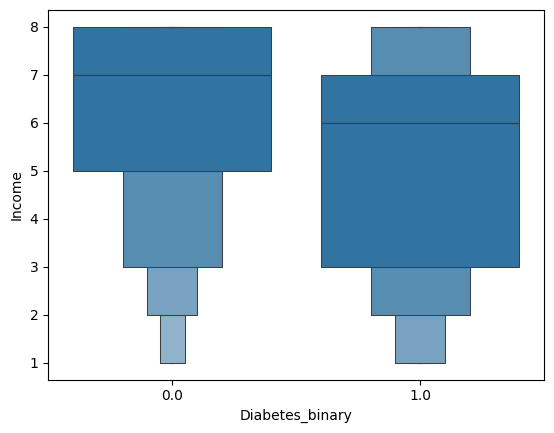

In [13]:
income_diabetes = sns.boxenplot(x='Diabetes_binary', y='Income', data=df)

### Education vs Diabetes

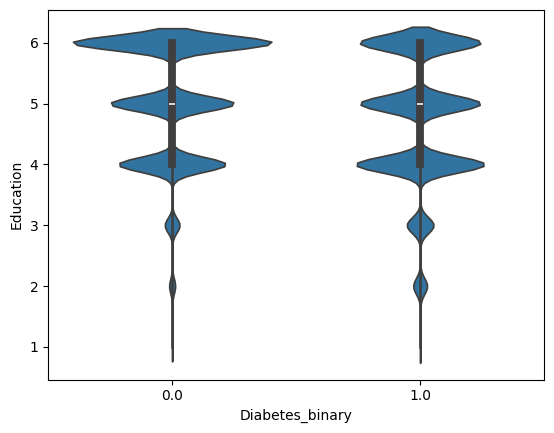

In [27]:
education_diabetes = sns.violinplot(x='Diabetes_binary', y='Education', data=df)

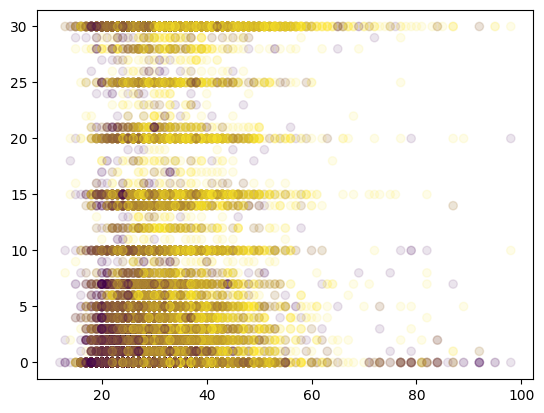

In [16]:
plt.scatter(df['BMI'], df['PhysHlth'], c=df['HighBP'], alpha=0.1)
plt.show()

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_cols = [col for col in X.columns if len(X[col].unique()) >= 10]
cat_cols = [col for col in X.columns if col not in num_cols]

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

preprocessor.fit(X)
X_scaled = preprocessor.transform(X)

## Dimensionality Reduction

In [18]:
from umap import UMAP

umap_model = UMAP(n_neighbors=1000)
X_umap = umap_model.fit_transform(X_scaled)

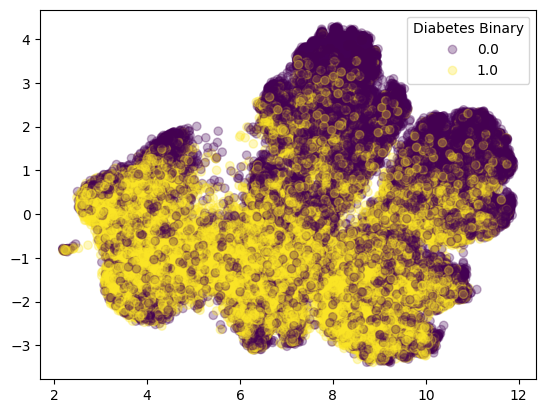

In [26]:
# Assuming X_umap is your UMAP-transformed data and y contains the labels
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, alpha=0.3)

# Create a legend based on the unique values in y (assuming y is categorical)
# Create a list of unique labels
unique_labels = list(set(y))

# Adding legend with the unique labels
plt.legend(handles=scatter.legend_elements()[0], labels=unique_labels, title="Diabetes Binary")

# Show the plot
plt.show()

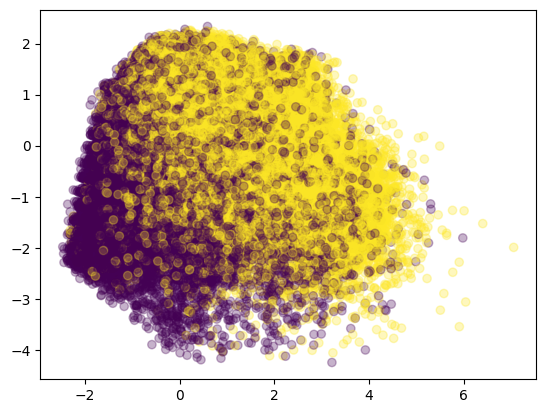

In [20]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.3)
plt.show()

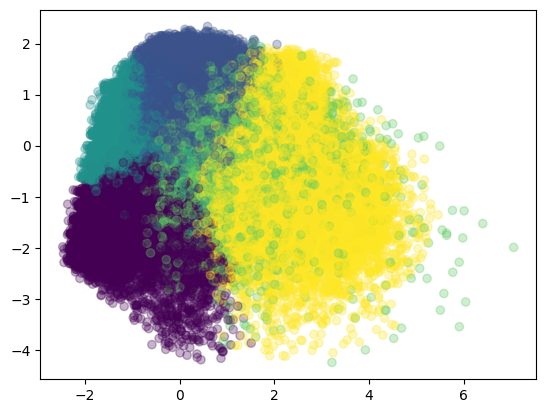

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

y_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, alpha=0.3)
plt.show()

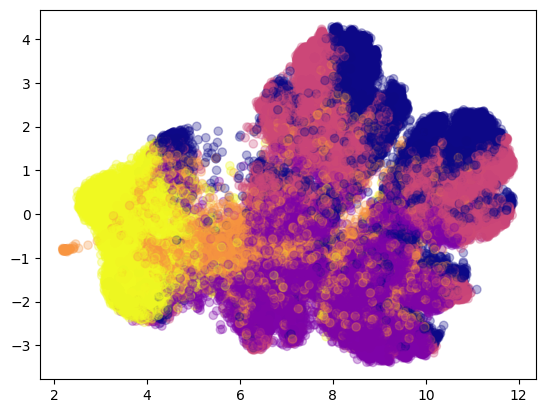

In [22]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_kmeans, alpha=0.3, cmap='plasma')
plt.show()